### Imports

In [2]:
!jupyter nbextension disable variable_inspector

Disabling notebook extension variable_inspector...
      - Validating: problems found:
        - require?  X variable_inspector


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#other
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Plotly 
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#spaCy
import spacy
nlp = spacy.load("fr_core_news_lg")
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French
import string
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

### Load (acceptably clean) data

In [19]:
data=pd.read_pickle("../../data/nodesc_clean.pkl")
data_np=data.to_numpy()

In [20]:
i=5648
data_np[i]

'calendrier et résultats toulouse olympique 13. championship rugby sport toxiii'

In [21]:
import progressbar
bar = progressbar.ProgressBar(maxval=len(data_np), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])


In [22]:
data_np_noloc=np.load('../../data/data_np_noloc.npy', allow_pickle=True)

In [23]:
data_np_noloc[350]

'santé bretagne. . aide boosterr santé accordée via un appel manifestation d’intérêt vise soutenir les initiatives innovantes et expérimentales des territoires permettant de maintenir et développer les services de santé de proximité pour les et les et plus particulièrement sur les territoires les plus fragiles. origine localisation l adresse via . organisations partenaires région bretagne liens annexes carte booster sante amp lb positron amp config . amp mode consulter cette fiche sur datasets . donnees ouvertes passerelle inspire sante society'

In [24]:
spacy.displacy.render(nlp(data_np_noloc[2]), style='ent',jupyter=True)

## Process data to extract keywords only

### Remove the locs (there might be a better way)

In [25]:
def remove_locs(doc):
    all_locs=[]
    bar.start()
    for i in range(len(doc)):
        temp = ""
        for token in nlp(doc[i]):
            if not token.ent_type_=='LOC':
                temp += token.text
                if token.whitespace_:
                    temp += " "
            else:
                all_locs.append(token.text)
        doc[i]=temp
        bar.update(i+1)
    bar.finish()
    return(doc, set(all_locs))

In [26]:
#data_np_noloc=data_np
#data_np_noloc, locs=remove_locs(data_np_noloc)
locs={'..',
 '20',
 'abit',
 'abondant',
 'abos',
 'adour',
 'ads',
 'aeroport',
 'agenda',
 'agrees',
 'ajaccien',
 'alea',
 'algue',
 'alpes',
 'aquitain',
 'aquitaine',
 'ardèche',
 'armentières',
 'arrest',
 'artificialisée',
 'artois',
 'arzel',
 'astaffort',
 'atlantique',
 'atlantiques',
 'auberge',
 'aubigny',
 'augustins',
 'auron',
 'auvergne',
 'axareal',
 'azur',
 'baie',
 'baliros',
 'barbery',
 'bardos',
 'barrières',
 'bas',
 'bassin',
 'bazens',
 'bd',
 'belle',
 'bezing',
 'billancourt',
 'biota',
 'biotopes',
 'bièvre',
 'boundaries',
 'bourbince',
 'bourgogne',
 'bretagne',
 'briel',
 'brou',
 'c.',
 'cadastrale',
 'cafe',
 'canal',
 'canton',
 'carbonnel',
 'carthage',
 'cdif',
 'centre',
 'cezeracq',
 'chambre',
 'charente',
 'charentes',
 'charnay',
 'chateauneuf',
 'chaville',
 'chevaigne',
 'chu',
 'ciel',
 'cimiez',
 'commnne',
 'competence',
 'comté',
 'conseil',
 'controle',
 'coquette',
 'cormeilles',
 'corse',
 'craon',
 'crotoy',
 'cugn',
 'cézéracq',
 'côte',
 "d'",
 'darcachon',
 'de',
 'denis',
 'departement',
 'departemental',
 'departementale',
 'departements',
 'des',
 'donnee',
 'donnees',
 'doubs',
 'dpo',
 'du',
 'dunaire',
 'département',
 'ec',
 'eco',
 'europe',
 'europeenne',
 'europeennes',
 'evaluation',
 'fauillet',
 'ferté',
 'flibeaucourt',
 'france',
 'franche',
 'français',
 'françois',
 'garonne',
 'gascogne',
 'gavaudun',
 'generique',
 'gironde',
 'golfe',
 'goulven',
 'grand',
 'guadeloupe',
 'guyane',
 'gâvres',
 'habitats',
 'hacha',
 'hallon',
 'igp',
 'ile',
 'inde',
 'indien',
 'infolocale',
 'inland',
 'intercommunalite',
 'intertidal',
 'intertidaux',
 'iroise',
 'isere',
 'isohypses',
 'issy',
 'isère',
 'jaugeages',
 "l'",
 'l.',
 'la',
 'landes',
 'lascaris',
 'les',
 'lezons',
 'limousin',
 'loir',
 'loire',
 'lot',
 'lès',
 'manche',
 'marmande',
 'marne',
 'martinsart',
 'massif',
 'matisse',
 'meillon',
 'metropole',
 'metropolitaine',
 'mettis',
 'metz',
 'meuble',
 'meudon',
 'milieu',
 'montdidier',
 'montpellier',
 'moulineaux',
 'moulins',
 'musee',
 'méditerranée',
 'métropode',
 'métropole',
 'nan',
 'nancy',
 'nantaise',
 'nantes',
 'necmergitur',
 'nice',
 'nogent',
 'nonneuse',
 'nord',
 'normandie',
 'nousty',
 'néerlandais',
 'octeville',
 'olonne',
 'or',
 'orly',
 'orléans',
 'orne',
 'ouche',
 'ouen',
 'paache',
 'pache',
 'parc',
 'paris',
 'passerelle',
 'pays',
 'pierre',
 'piétat',
 'poitiers',
 'poitou',
 'ponctuel',
 'prevision',
 'provence',
 'pyrénées',
 'qualiville',
 'quesnoy',
 'region',
 'regions',
 'reglementat',
 'relais',
 'repere',
 'reserves',
 'residence',
 'resultat',
 'resultats',
 'reunion',
 'rhin',
 'rhone',
 'rhus',
 'rhône',
 'rica',
 'riscle',
 'rogerville',
 'rolleville',
 'rue',
 'région',
 'réunion',
 'sableuse',
 'saint',
 'saone',
 'sarthe',
 'saône',
 'seille',
 'seine',
 'sejou',
 'semoy',
 'sentier',
 'sevres',
 'sinp',
 'somme',
 'sommellerie',
 'soubiran',
 'specialisee',
 'square',
 'stq',
 'stsisi',
 'subtidaux',
 'sud',
 'sully',
 'tamm',
 'tarn',
 'teil',
 'territoires',
 'tomblaine',
 'toulouse',
 'trentennale',
 'unienville',
 'val',
 'vallee',
 'vallée',
 'vanves',
 'vichy',
 'villeneuve',
 'villeur',
 'virac',
 'y.',
 'yerres',
 'yvette',
 'zfu',
 'île'}

In [27]:
locs.remove('alea')

In [28]:
locs

{'..',
 '20',
 'abit',
 'abondant',
 'abos',
 'adour',
 'ads',
 'aeroport',
 'agenda',
 'agrees',
 'ajaccien',
 'algue',
 'alpes',
 'aquitain',
 'aquitaine',
 'ardèche',
 'armentières',
 'arrest',
 'artificialisée',
 'artois',
 'arzel',
 'astaffort',
 'atlantique',
 'atlantiques',
 'auberge',
 'aubigny',
 'augustins',
 'auron',
 'auvergne',
 'axareal',
 'azur',
 'baie',
 'baliros',
 'barbery',
 'bardos',
 'barrières',
 'bas',
 'bassin',
 'bazens',
 'bd',
 'belle',
 'bezing',
 'billancourt',
 'biota',
 'biotopes',
 'bièvre',
 'boundaries',
 'bourbince',
 'bourgogne',
 'bretagne',
 'briel',
 'brou',
 'c.',
 'cadastrale',
 'cafe',
 'canal',
 'canton',
 'carbonnel',
 'carthage',
 'cdif',
 'centre',
 'cezeracq',
 'chambre',
 'charente',
 'charentes',
 'charnay',
 'chateauneuf',
 'chaville',
 'chevaigne',
 'chu',
 'ciel',
 'cimiez',
 'commnne',
 'competence',
 'comté',
 'conseil',
 'controle',
 'coquette',
 'cormeilles',
 'corse',
 'craon',
 'crotoy',
 'cugn',
 'cézéracq',
 'côte',
 "d'",
 '

### Remove stopwords and special loc list

In [29]:
special_words=['données', 'open', 'data', 'commune','–', '.', '\'',':', 'brest','mayenne','region', 'departement', 'communes', 'canton', 'publique', 'publiques', 'public', 'publics', 'cantons', 'territoires', 'liste', 'public', 'risque', 'risques', 'zone', 'ouverte', 'ouvertes', 'zones', 'territoire', 'donnée', 'métropole', 'opendata', 'rhin', 'landes', 'loire', 'savoie', 'oise', 'document','zonage', 'departemental', 'communal', 'inspire','régionale', 'département', 'territoriales', 'territoriale', 'ouvertes', 'ville', 'haute', 'haut', 'bas', 'basse', 'alpes', 'rhone', 'auvergne', 'nan']

In [30]:
stopwords_full=special_words+list(locs)+stopwords

In [31]:
stopwords_full

['données',
 'open',
 'data',
 'commune',
 '–',
 '.',
 "'",
 ':',
 'brest',
 'mayenne',
 'region',
 'departement',
 'communes',
 'canton',
 'publique',
 'publiques',
 'public',
 'publics',
 'cantons',
 'territoires',
 'liste',
 'public',
 'risque',
 'risques',
 'zone',
 'ouverte',
 'ouvertes',
 'zones',
 'territoire',
 'donnée',
 'métropole',
 'opendata',
 'rhin',
 'landes',
 'loire',
 'savoie',
 'oise',
 'document',
 'zonage',
 'departemental',
 'communal',
 'inspire',
 'régionale',
 'département',
 'territoriales',
 'territoriale',
 'ouvertes',
 'ville',
 'haute',
 'haut',
 'bas',
 'basse',
 'alpes',
 'rhone',
 'auvergne',
 'nan',
 'martinsart',
 'jaugeages',
 'donnees',
 'loir',
 'algue',
 'chateauneuf',
 'inland',
 'néerlandais',
 'flibeaucourt',
 'saône',
 'armentières',
 'normandie',
 'carthage',
 '..',
 'ec',
 'français',
 'artificialisée',
 'metz',
 'ponctuel',
 'stq',
 'pays',
 'sommellerie',
 'carbonnel',
 'rolleville',
 'isere',
 'sinp',
 'atlantiques',
 'matisse',
 'chevaig

In [32]:
parser=French()
def spacy_tokenizer(sentence):
    tokens=parser(sentence)
    tokens = [ word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords_full]
    tokens = " ".join([i for i in tokens])
    return tokens

def basic_tokenizer(sentence):
    tokens=parser(sentence)
    tokens = [ word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords]
    tokens = " ".join([i for i in tokens])
    return tokens


In [33]:
data_np_nostop=[]
bar.start()
for i in range(len(data_np)):
    data_np_nostop.append(basic_tokenizer(data_np_noloc[i]))
    bar.update(i+1)
bar.finish()

[========================================================================] 100%


In [34]:
np.save('../../data/data_np_nostop.npy', np.array(data_np_nostop, dtype=object), allow_pickle=True)

In [17]:
data_flat1=''.join(data_np_nostop)

In [18]:
len(data_flat1)

5317910

In [19]:
from collections import Counter

# all tokens that arent stop words or punctuations
words = [token.text for token in nlp(data_flat1[:1000000])] 

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(500)

KeyboardInterrupt: 

In [ ]:
common_words

### Simple Projections

In [8]:
#data_np_nostop=data_np_noloc

### For each dataset 

In [41]:
vectors=[]
bar.start()
for i in range(len(data_np)//10):
    doc=nlp(data_np_nostop[i])
    vectors_doc=[]
    for token in doc:
        vectors_doc.append(token.vector)
    vectors.append(vectors_doc)
    bar.update(i+1)
bar.finish()

In [44]:
data_np_nostop[21]

"médiations culturelles musées ville d ' . d ' . fréquentation médiations culturelles service publics direction musées ville saison base mensuelle type médiation catégorie public .. art culture enfants handicap mediation musees"

In [45]:
np.var(vectors[21])

6.152725

In [8]:
nlp(data_np_nostop[759])

evolution habitats naturels arch territoires nord calais . biodiversite biologie developpement durable donnees ouvertes ecologie environnement faune flore habitats biotopes habitats naturels hauts france occupation terres programme europeen sites proteges

In [60]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(vectors_clean)
vectors_pca=pca.transform(vectors_clean)

In [61]:
vectors_pca=vectors_pca.transpose()

In [62]:
x,y = np.mean(vectors_pca[0]), np.mean(vectors_pca[1])

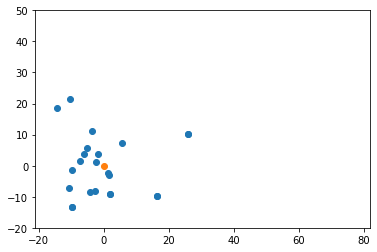

In [64]:
plt.xlim(-21, 82)
plt.ylim(-20, 50)
plt.scatter(vectors_pca[0], vectors_pca[1])
plt.scatter(x, y)

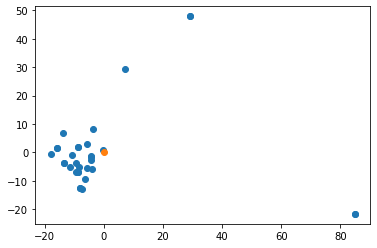

In [53]:
plt.scatter(vectors_pca[0], vectors_pca[1])
plt.scatter(x, y)

In [54]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(vectors[21])

In [58]:
truth=clf.predict(vectors[21])

In [59]:
vectors_clean=[]
for i in range(len(vectors[21])):
    if truth[i]==1:
               vectors_clean.append(vectors[21][i])

### Avec la moyenne

In [27]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=30)
pca.fit(vectors)
vectors_pca=pca.transform(vectors)

In [60]:
np.save('vectors_pca_30', vectors_pca, allow_pickle=True)

In [11]:
pca.explained_variance_ratio_

array([0.14567723, 0.08483204, 0.06214322, 0.05020891, 0.03913708,
       0.03183701, 0.03040404, 0.02829356, 0.02482918, 0.02238009,
       0.01972431, 0.01882157, 0.01648257, 0.01434914, 0.01355554,
       0.01274049, 0.01259866, 0.0117206 , 0.01099382, 0.01006769,
       0.00864109, 0.00857631, 0.00848795, 0.00792835, 0.00773381,
       0.00749747, 0.00701053, 0.00641679, 0.00614519, 0.0059616 ])

In [69]:
#j=random.randint(len(data_np)//3, len(data_np))
my_sentence='Emissions CO2 polluants vehicules commercialises France'
#x=nlp(data_np_nostop[j]).vector
x=nlp(my_sentence).vector
#print(data_np_nostop[j])
#print(data_np[j])

In [70]:
y=pca.transform([x])

In [71]:
from scipy import spatial
A = vectors_pca 
tree = spatial.KDTree(A)

In [81]:
dist, pos=tree.query(y, k=30)
print(dist)
print(pos)
for k in range(pos.shape[1]):
    print(data_np[pos[0][k]])
    print(get_id(pos[0][k]))

[[5.7311499  6.52357685 6.71550204 7.02593707 7.04651144 7.16535419
  7.27805268 7.28771327 7.28771327 7.28771327 7.28771327 7.28771327
  7.28771327 7.30561344 7.31423706 7.31423706 7.31423706 7.31423706
  7.31423706 7.31423706 7.40070222 7.4031384  7.43237294 7.46945773
  7.48850188 7.51070763 7.51964888 7.55541946 7.62111302 7.62771583]]
[[ 2915   797 37819  2910  2909 11940 12619  3073  9436  9456  9457  9506
   9511 26778  3074  9412  9425  9459  9460  9469 11944  9240  9222   181
   3064  5365 13793  1041   893  9319]]
bilans d'émissions de ges publiés sur le site de l'ademe. ademe emissions emissions co2 emissions de gaz effet de serre gaz effet de serre ges
5db60fb28b4c412aa82e1447
consommation journalière et horaire de gaz des clients industriels par région réseaux grtgaz + terega données définitives. consommation consommation gaz grtgaz terega territoires et regions
5e8bfb816ba0b9240dd1046b
emissions de co2 et de polluants des véhicules commercialisés en france . automobile bo

In [74]:
##### Takes a search query as input and get the vectors from the whole dataset to compare.
import spacy
import pickle
import numpy as np
from scipy import spatial
import sys
import unidecode
#from sklearn.decomposition import PCA
#QUERY  Neighbours Ids_and_Score_bool
directory='../'
argv=sys.argv
nlp = spacy.load("fr_core_news_lg")
pca = pickle.load(open(directory+'models/pca_30.pkl','rb'))
pca_space= np.load(directory+'models/vectors_pca_30.npy', allow_pickle=True)
id_table=np.load(directory+'../data/id_table.npy', allow_pickle=True)
tree = spatial.KDTree(pca_space)
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French
parser=French()
stopwords = list(STOP_WORDS)

def process_query(search_query):
    query=str(search_query).lower()
    clean_query = unidecode.unidecode(query)
    tokens=parser(clean_query)
    tokens = [ word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stopwords]
    tokens = " ".join([i for i in tokens])
    return (tokens)

def project_sentence(search_query):
    x=nlp(search_query).vector #spacy 300d
    y=pca.transform([x]) #pca 30d
    return(y)

def get_id(idx):
    dataset_id=id_table[idx-1]
    return(dataset_id)

def neighbours(vector, n):
    n_ids=[]
    score=[]
    dist, pos=tree.query(vector, k=n)
    for j in range(pos.shape[1]):
        n_ids.append(get_id(pos[0][j]))
        score.append(1-dist[0][j]/50) ##very approximate metric 
    return(n_ids, score)

def main(search_query, n):
    n_ids, score=neighbours(project_sentence(process_query(search_query)), n)
    #print(n_ids, score)
    return(n_ids, score)

In [30]:
pca.explained_variance_ratio_

array([0.19229983, 0.12747149, 0.08510949, 0.0617465 , 0.05134224,
       0.03700298, 0.03650363, 0.02593797, 0.02309186, 0.02071904,
       0.01917212, 0.01680801, 0.01483218, 0.01264127, 0.01200923,
       0.01100737, 0.0099373 , 0.00896721, 0.00848197, 0.00791144,
       0.00741915, 0.00737072, 0.00661675, 0.00606335, 0.00575441,
       0.0055471 , 0.00552672, 0.00527732, 0.00493092, 0.00480065,
       0.00472615, 0.00419776, 0.0039829 , 0.00379603, 0.00352269,
       0.0033254 , 0.00327075, 0.00307533, 0.00301943, 0.00285469])

In [ ]:
import pickle

In [61]:
pickle.dump(pca, open("pca_30.pkl","wb"))

In [36]:
data_np[1]

"laboratoires d'analyses médicales vihtest. depistage equipements sante services social vih"

## Global Map of producteurs

In [78]:
producteurs_np=pd.read_pickle("../../data/prod_set.pkl").to_numpy()

In [79]:
producteurs_np=producteurs_np.transpose()[0]

#### Kmeans on tags

In [43]:
df_prod=pd.read_pickle("../../data/df_prod_tags.pkl")

In [44]:
df_prod_np=df_prod.to_numpy()

In [45]:
df_prod_np.shape

(1163, 2)

In [46]:
vector_prod_tags=[]
bar.start()
for i in range(df_prod_np.shape[0]):
    vector_prod_tags.append(nlp(spacy_tokenizer(df_prod_np[i][1])).vector)
    bar.update(i+1)
bar.finish()

In [47]:
from sklearn.cluster import *
clustering=KMeans(n_clusters=100, n_init=50, max_iter=1000, tol=1e-3, random_state=42).fit(vector_prod_tags)
Labels=clustering.labels_
print(Labels)

[22 39  1 ... 20 91 65]


In [48]:
df_prod['labels']=Labels

In [57]:
df_prod[200:250]

,Column4,minuscules.1,labels
200,Communauté d'Agglomération de la Région Dieppo...,nan,1
201,Communauté d'Agglomération de la Région de Com...,"adresse,adresses,ca-de-la-region-de-compiegne-...",73
202,Communauté d'Agglomération du Bassin de Brive,"acteurs-institutionnels,administratif,agglomer...",66
203,Communauté d'Agglomération du Grand Cahors,"cahors,etude,grandcahors,numeriques accessibil...",46
204,Communauté d'Agglomération du Grand Dole,nan,1
205,Communauté d'Agglomération du Pays Ajaccien,"capa-ajaccio,gtfs,transport-en-commun agglomer...",22
206,Communauté d'Agglomération du Pays de Saint-Omer,"capso,mouveo,pays-de-saint-omer,pso,saint-omer...",3
207,Communauté d'Agglomération du Saint-Quentinois,"200,geospatial,voi,voirie com,dev,ecologie,gas...",34
208,Communauté d'agglomération Cannes Lérins,"borne-de-recharge,irve,mobilite-electrique,poi...",53
209,Communauté d'agglomération Paris - Vallée de l...,"capvm,equipements,geospatial,opendata,scdl,scd...",4


In [50]:
df_classified_prods=df_prod.groupby('labels').Column4.apply(list).reset_index()

In [56]:
df_classified_prods.to_numpy()[79]

array([79,
       list(["Agence landaise pour l'informatique", 'Arles Crau Camargue Montagnette', "Chambre de Métiers et de l'Artisanat de Tarn-et-Garonne", "Commission de récolement des dépôts d'oeuvres d'art", 'DDT Dordogne', 'DOUAISIS AGGLO', 'DREAL Haute-Normandie', 'Direction interrégionale de la mer Manche Est - mer du Nord', 'Débutant-e-AccepT', 'La ROCHELLE UNIVERSITE', 'Les Lilas', 'Metz Métropole', 'Office National des Forêts', 'Parc naturel régional des Vosges du Nord', 'PubliXL', 'Pôle métropolitain du Pays de Brest', 'SMICA', 'Seine-Saint-Denis - Le Département', "Service Départemental d'Incendie et de Secours du Bas-Rhin", 'Shom', 'Ville de Lorient', 'Ville de Nancy', "Ville de Pont-l'Abbé", 'wpd'])],
      dtype=object)

#### Kmeans PCA etc.

In [166]:
vector_prod=[]
bar.start()
for i in range(len(producteurs_np)):
    vector_prod.append(nlp(producteurs_np[i]).vector)
    bar.update(i+1)
bar.finish()

In [178]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(vector_prod)
vector_prod_pca=pca.transform(vector_prod)

In [182]:
from sklearn.cluster import *
clustering=KMeans(n_clusters=4, n_init=50, max_iter=1000, tol=1e-3, random_state=42).fit(vector_prod_pca)
Labels=clustering.labels_

In [183]:
df= pd.DataFrame(data= vector_prod_pca, columns= list(np.arange(3)))
predict = clustering.predict(vector_prod_pca)
df['cluster'] = predict

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36010dfd0>,
      dtype=object)

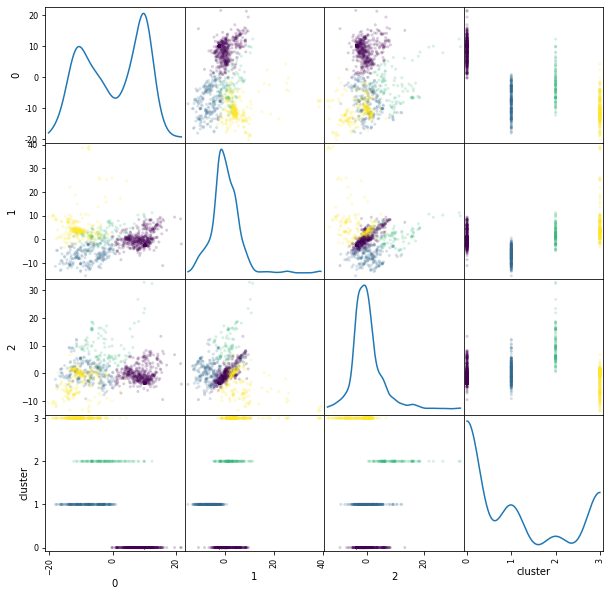

In [184]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde', c=Labels, cmap='viridis')

#### LDA

In [120]:
def remove_locs(doc):
    all_docs=[None]*len(doc)
    bar.start()
    for i in range(len(doc)):
        this_doc=[]
        for token in nlp(doc[i]):
            if token.ent_type_=='LOC':
                continue
            else:
                this_doc.append(token.text)
        all_docs[i]=' '.join(this_doc)
        bar.update(i+1)
    bar.finish()
    return(all_docs)



In [121]:
producteurs_np1=remove_locs(producteurs_np)

In [122]:
producteurs_np1

['DDTM -',
 '',
 "Ville d'",
 'Ministère des sports',
 '',
 'GIP Centre - e-Santé',
 "Syndicat des Eaux du Bassin de l' Ardèche",
 'des 4',
 '',
 'CD 54',
 '',
 'Robots domestiques dans les ménages français',
 "et de l' estuaire",
 'Ordre des géomètres - experts',
 '',
 '',
 'Institut des politiques publiques ( IPP )',
 'Métropole du',
 "Agence Nationale de la Sécurité des Systèmes d' Information",
 "Centre national d' art et de culture Georges Pompidou",
 'Établissement public du château , du musée et du',
 '',
 'Mairie de ( )',
 "L' alliance thématique nationale des sciences humaines et sociales",
 '',
 'Mairie de',
 'Syndicat Couserans Service public',
 '',
 'Conseil départemental de la somme',
 'Ville de -',
 'MAIRIE DE',
 'Bus urbains thononais',
 'Mairie de',
 'JCDecaux developer',
 '',
 'DREAL Nouvelle Aquitaine',
 'Parlement européen',
 '',
 'SYNAPSE ENTREPRISES',
 'GIP Maximilien',
 "Syndicat Mixte des Mobilités de l'",
 'Fédération Nationale de Protection Civile',
 "Conseil S

In [128]:
producteurs_np_clean=[]
bar.start()
for i in range(len(producteurs_np1)):
    producteurs_np_clean.append(basic_tokenizer(producteurs_np1[i]))
    bar.update(i+1)
bar.finish()

In [145]:
producteurs_np_clean

['ddtm -',
 '',
 "ville d '",
 'ministère sports',
 '',
 'gip centre - e-santé',
 "syndicat eaux bassin l ' ardèche",
 '4',
 '',
 'cd 54',
 '',
 'robots domestiques ménages français',
 "l ' estuaire",
 'ordre géomètres - experts',
 '',
 '',
 'institut politiques publiques ( ipp )',
 'métropole',
 "agence nationale sécurité systèmes d ' information",
 "centre national d ' art culture georges pompidou",
 'établissement public château , musée',
 '',
 'mairie ( )',
 "l ' alliance thématique nationale sciences humaines sociales",
 '',
 'mairie',
 'syndicat couserans service public',
 '',
 'conseil départemental somme',
 'ville -',
 'mairie',
 'bus urbains thononais',
 'mairie',
 'jcdecaux developer',
 '',
 'dreal nouvelle aquitaine',
 'parlement européen',
 '',
 'synapse entreprises',
 'gip maximilien',
 "syndicat mixte mobilités l '",
 'fédération nationale protection civile',
 "conseil supérieur l ' audiovisuel",
 '',
 '',
 'opendatafrance',
 '',
 "communal d ' action sociale",
 '',
 'syn

In [146]:
vectorizer_prod = CountVectorizer(min_df=3, max_df=5000, lowercase=True, strip_accents='unicode', ngram_range=(1,2))
data_vectorized_prod = vectorizer_prod.fit_transform(producteurs_np_clean)

In [157]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=40, max_iter=50, evaluate_every=5, verbose=True)
data_lda = lda.fit_transform(data_vectorized_prod)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50, perplexity: 190.6187
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50, perplexity: 184.2849
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50, perplexity: 184.2849


In [158]:
print("LDA Model:")
selected_topics(lda, vectorizer_prod)

LDA Model:
Topic 0:
[('direction', 7.024999999999986), ('generale', 3.024999999999989), ('direction generale', 3.024999999999989), ('sas', 3.024999999999978), ('environnement', 3.024999999999968), ('administration', 2.0249999999999875), ('publique', 2.0249999999999875), ('numerique', 2.0249999999999853), ('regionale', 1.0249999999999855), ('amenagement', 1.0249999999999855)]
Topic 1:
[('etablissement', 9.02499999999998), ('public', 7.024999999999983), ('etablissement public', 6.024999999999989), ('donnees', 5.02499999999997), ('publiques', 3.024999999999977), ('enseignement', 1.0249999999999833), ('national', 0.025000000000000005), ('amenagement', 0.025000000000000005), ('ecole', 0.025), ('eau', 0.025)]
Topic 2:
[('loire', 8.024999999999974), ('mobilites', 5.024999999999977), ('reseaux', 3.0249999999999666), ('pays', 2.9860304346380033), ('air', 1.0249999999999875), ('ville', 0.025), ('draaf', 0.025), ('education', 0.025), ('economie', 0.025), ('ecole', 0.025)]
Topic 3:
[('recherche', 

In [160]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized_prod, vectorizer_prod, mds='mmds')
dash

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
38    -0.447157 -0.206181       1        1  6.065339
33    -0.450217  0.030582       2        1  4.999528
8     -0.156490 -0.383877       3        1  4.660941
9     -0.072753 -0.467424       4        1  4.326013
14    -0.036051  0.400562       5        1  4.192443
22    -0.359245  0.249327       6        1  3.498342
39    -0.478308  0.188852       7        1  3.469770
21    -0.321480 -0.388979       8        1  3.276119
34     0.124491 -0.445790       9        1  3.093480
32     0.287759 -0.333960      10        1  3.033045
17     0.170357 -0.313530      11        1  2.857089
18     0.238619  0.451566      12        1  2.741397
37    -0.365881 -0.058024      13        1  2.681675
36     0.418429  0.159788      14        1  2.662528
1     -0.248354  0.365158      15        1  2.662230
30    -0.114567  0.415374      16        1  2.618059
15     0.341038 -0.240500      17        1  2.508426
0      0.291373 -0.148894      18        1  2.474730
13     0.470889 -0.090240      19        1  2.333659
19     0.349850  0.293228      20        1  2.262230
7      0.180261 -0.120929      21        1  2.182469
4      0.408841  0.039000      22        1  2.148342
28    -0.231865 -0.052091      23        1  2.103897
25    -0.287135 -0.191980      24        1  2.069192
31     0.024950 -0.339554      25        1  2.060842
10    -0.100663  0.270802      26        1  2.028897
12    -0.144433 -0.211274      27        1  1.973639
2      0.181158  0.290139      28        1  1.895128
35     0.089461  0.368982      29        1  1.885842
27     0.045215 -0.180491      30        1  1.815802
29     0.249877  0.005687      31        1  1.571953
11    -0.003611  0.212478      32        1  1.523069
6      0.232974  0.117293      33        1  1.456675
24    -0.146180  0.048272      34        1  1.403897
16     0.140465  0.154914      35        1  1.384916
26    -0.231632  0.166899      36        1  1.290008
3     -0.062143  0.072328      37        1  1.281789
20    -0.073344 -0.131120      38        1  1.278897
23     0.077775 -0.010020      39        1  1.273342
5      0.007730  0.013629      40        1  0.954360, topic_info=          Term       Freq      Total Category  logprob  loglift
159      ville  36.000000  36.000000  Default  30.0000  30.0000
28     commune  35.000000  35.000000  Default  29.0000  29.0000
94      mairie  31.000000  31.000000  Default  28.0000  28.0000
34         ddt  22.000000  22.000000  Default  27.0000  27.0000
144   syndicat  35.000000  35.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
70    francais   0.040901   5.994369  Topic40  -5.6348  -0.3355
77         gip   0.040901   3.816904  Topic40  -5.6348   0.1158
76     gestion   0.040901   8.077553  Topic40  -5.6348  -0.6338
72      france   0.040901  12.746016  Topic40  -5.6348  -1.0899
71   francaise   0.040901   3.764953  Topic40  -5.6348   0.1296

[2059 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0        31  0.699529           acces
1        11  0.826690          action
2         8  0.289864  administration
2        18  0.579728  administration
3         5  0.462044          agence
...     ...       ...             ...
156      14  0.585227         urbains
157      11  0.885219       urbanisme
158      14  0.188258          vallee
158      25  0.753031          vallee
159       7  0.975103           ville

[261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[39, 34, 9, 10, 15, 23, 40, 22, 35, 33, 18, 19, 38, 37, 2, 31, 16, 1, 14, 20, 8, 5, 29, 26, 32, 11, 13, 3, 36, 28, 30, 12, 7, 25, 17, 27, 4, 21, 24, 6])

In [161]:
pyLDAvis.save_html(dash, 'lda_p_40_v2_mmds.html')

### Vectorizer read documentation again

In [ ]:
data_np_nostop=np.load('../../data/data_np_nostop.npy')

In [43]:
vectorizer = CountVectorizer(min_df=10, max_df=5000, lowercase=True, strip_accents='unicode', ngram_range=(1,2))
data_vectorized = vectorizer.fit_transform(data_np_nostop)

### LDA read documentation and paper again

In [66]:
NUM_TOPICS = 30

In [67]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=50, evaluate_every=5, verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50, perplexity: 812.3701
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50, perplexity: 768.2411
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50, perplexity: 761.6278
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50, perplexity: 760.2759
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50, perplexity: 759.7849
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50

In [33]:
np.save('../../data/data_ldav5_nondesc_40.npy', data_lda, allow_pickle=True)

In [27]:
data_lda=np.load('../../data/data_ldav4_nondesc_40.npy', allow_pickle=True)

In [68]:
# Keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [69]:
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('inondation', 808.5169127304231), ('nouvelle', 540.0166068428666), ('dreal', 531.7759560592727), ('tri', 506.9331758337828), ('directive', 399.82420406855033), ('directive inondation', 387.1250624310869), ('environment', 348.98273345142314), ('air', 324.362847037159), ('dreal environment', 239.65600437661197), ('qualite', 236.94596141190044)]
Topic 1:
[('temps', 400.27663141722354), ('reseau', 382.67194232107744), ('routier', 321.19336588963915), ('horaires', 303.29871002956645), ('reel', 297.0333333333241), ('temps reel', 295.03333333332444), ('transportation', 283.29684129386646), ('gtfs', 275.93996300347413), ('route', 256.7372116981131), ('communaute', 236.6857918198714)]
Topic 2:
[('environnement', 677.2978045482463), ('equipements', 633.5307541954744), ('batiments', 504.0130339117177), ('dechets', 469.3143243339483), ('vie', 432.535638660235), ('amenagement', 394.1742448842014), ('logement', 390.0374388839417), ('urbanisme', 330.607778236061), ('etat', 326.1

[('mer', 302.89288835369655), ('maritime', 245.53828518345236), ('insee', 139.84056937327412), ('code', 138.3461396672666), ('havre', 126.0333333333279), ('deliberation', 120.28116450322584), ('herault', 119.47012880145567), ('estuaire', 114.07548100572015), ('communaute', 112.64615112189634), ('caux', 108.0333333333273)]


In [72]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='mmds')
dash

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.408589 -0.282466       1        1  5.297789
15     0.093325 -0.324406       2        1  4.676174
4     -0.472428 -0.143804       3        1  4.548322
11     0.436780 -0.265197       4        1  4.508987
17     0.237349 -0.329523       5        1  4.226748
27     0.520233 -0.028536       6        1  4.131647
10     0.430869  0.222210       7        1  3.805215
9     -0.029354 -0.500737       8        1  3.777600
12    -0.253384 -0.283154       9        1  3.753753
14    -0.216358 -0.436284      10        1  3.749679
2     -0.172859  0.068621      11        1  3.699923
0     -0.460609  0.047021      12        1  3.656205
20     0.233879 -0.136146      13        1  3.593335
23    -0.053612 -0.072032      14        1  3.562830
3      0.045628  0.510101      15        1  3.409999
16    -0.305437  0.158634      16        1  3.200607
21    -0.321861  0.359707      17        1  3.118920
28    -0.297251 -0.100599      18        1  2.956278
22    -0.081284 -0.353523      19        1  2.914227
6      0.208239 -0.449274      20        1  2.870930
13     0.394892 -0.097978      21        1  2.795558
1      0.182140  0.404665      22        1  2.772092
26    -0.436822  0.207819      23        1  2.618035
18     0.017480  0.287744      24        1  2.527310
7     -0.197306  0.409125      25        1  2.518545
24    -0.076529  0.400231      26        1  2.464109
19     0.055398  0.082672      27        1  2.390829
29     0.379652  0.078429      28        1  2.384849
25     0.229734  0.195621      29        1  2.300498
8      0.318085  0.371057      30        1  1.769007, topic_info=            Term         Freq        Total Category  logprob  loglift
1414      budget  2709.000000  2709.000000  Default  30.0000  30.0000
6964  prevention  3912.000000  3912.000000  Default  29.0000  29.0000
6550         plu  3310.000000  3310.000000  Default  28.0000  28.0000
4723  inondation  4251.000000  4251.000000  Default  27.0000  27.0000
6501        plan  4866.000000  4866.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
6501        plan   165.094324  4866.129268  Topic30  -4.0801   0.6512
3566      espace    84.490444   518.678140  Topic30  -4.7499   2.2201
8532      titres    72.051569   143.768014  Topic30  -4.9092   3.3439
1656       carte    81.889575   940.284533  Topic30  -4.7812   1.5939
5635     migrant    70.730260   179.735645  Topic30  -4.9277   3.1021

[1622 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
0         5  0.194978                      01
0        16  0.169172                      01
0        22  0.627944                      01
0        30  0.002867                      01
1        22  0.985590                   01 01
...     ...       ...                     ...
9181     10  0.992510       zonages numerises
9184      3  0.996632  zonages reglementaires
9188     20  0.988771   zonages technologique
9190      1  0.999027           zonages usage
9191      5  0.993623         zonages zonages

[2916 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 16, 5, 12, 18, 28, 11, 10, 13, 15, 3, 1, 21, 24, 4, 17, 22, 29, 23, 7, 14, 2, 27, 19, 8, 25, 20, 30, 26, 9])

In [73]:
pyLDAvis.save_html(dash, 'lda_30_mmds.html')

In [60]:
# Transforming an individual sentence
text = spacy_tokenizer("reseau transport bus horaires adresse voirie arrêts")
x = lda.transform(vectorizer.transform([text]))[0]
print(x)

[0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.21466003 0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.0025     0.0025     0.0025     0.0025
 0.0025     0.0025     0.69033997 0.0025    ]


In [61]:
data_lda.shape

(42838, 40)

In [62]:
from scipy import spatial
A = data_lda
tree = spatial.KDTree(A)
tree.query(x)

(0.036395727662525794, 33977)

In [64]:
data_lda[33977]

array([0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.21810542, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.00147059, 0.00147059,
       0.00147059, 0.00147059, 0.00147059, 0.72601223, 0.00147059])

In [50]:
# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

In [51]:
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('naturels', 6.690459814758578), ('prevention naturels', 6.363634050934495), ('prevention', 5.929274208722528), ('plan prevention', 5.702648634745889), ('plan', 5.694749226707509), ('surfaciques', 1.797714074273231), ('ppr zonages', 1.6806251097502574), ('naturels pprn', 1.5112748039696662), ('perimetres', 1.4692899188734683), ('reglementees', 1.3840836688038782)]
Topic 1:
[('finances', 6.1499842789060075), ('loi', 3.826353820060777), ('loi finances', 3.5859651884114543), ('budget', 2.2942641746682555), ('letat', 1.9247598405520463), ('budget letat', 1.911860108136004), ('plf', 1.8272278501365435), ('lfi', 1.6807594120469331), ('finances plf', 1.6659717774696188), ('initiale', 1.6086569421441634)]
Topic 2:
[('inondation', 4.453352770957376), ('alea', 4.304968500394719), ('gestion', 4.24856672614686), ('restriction', 4.067504032532299), ('gestion restriction', 4.060658718253241), ('amenagement', 4.051610343743563), ('ppr', 3.7070825811937387), ('enjeux', 3.637275815

[('tourisme', 4.665738753214845), ('culture', 3.800791419737809), ('patrimoine', 3.0379628843956157), ('sport', 1.5483006176397778), ('equipements', 1.3658856535967059), ('loisirs', 1.330851416004663), ('sport tourisme', 0.6830271565286117), ('hebergement', 0.6033091921625671), ('art', 0.5464016052982253), ('culture tourisme', 0.5432976398958819)]
Topic 32:
[('immigration', 4.691719887244389), ('aide', 1.3194236404854325), ('etrangers', 1.2899579347380437), ('irreguliere', 1.1723638515457813), ('travail', 1.1654175984408084), ('migrant', 1.1620597850052672), ('frontiere', 1.1355600853949093), ('immigration irreguliere', 1.1010992825151602), ('immigre', 1.0852827222208539), ('espace', 1.0770976307931563)]
Topic 33:
[('citoyennete', 4.257746321408477), ('administration', 3.7085931661544684), ('finances', 3.701528613156891), ('gouvernement', 2.4381002665204194), ('finances gouvernement', 1.8748151312835646), ('administration citoyennete', 1.3983307911457268), ('citoyennete finances', 0.84